<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-18/EIS_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata


In [2]:
!pip install -q impedance
from impedance import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 629.0 kB/s eta 0:00:00


In [4]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 330 (delta 67), reused 14 (delta 8), pack-reused 197
Receiving objects: 100% (330/330), 15.76 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (143/143), done.


'/content'

In [5]:
%cd gator/data/
%cd data
%cd 06-18
%pwd
%ls

/content/gator/data
[Errno 2] No such file or directory: 'data'
/content/gator/data
/content/gator/data/06-18
0618_EIS.ipynb  0618_il1.z  0618_il2.z  0618_il3.z  0618_il4.z  eis.ipynb


In [6]:
from impedance import preprocessing
freqs, Z = preprocessing.readZPlot('0618_il4.z')

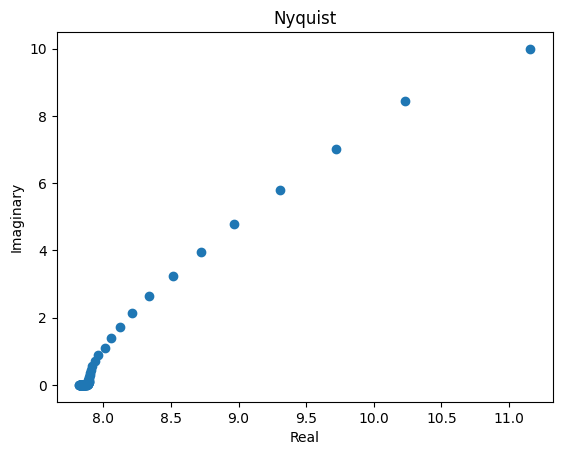

In [7]:
# prompt: plot Z on complex plane

plt.figure()
plt.plot(Z.real, Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
# plt.xlim(7,8)
plt.title('Nyquist')
plt.show()


In [37]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-CPE0'
initial_guess = [20,1e-3,0.1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [10]:
# circuit.fit(freqs, Z)

In [36]:
print(circuit)


Circuit string: R0-CPE0
Fit: False

Initial guesses:
     R0 = 2.00e+01 [Ohm]
  CPE0_0 = 1.00e-08 [Ohm^-1 sec^a]
  CPE0_1 = 1.00e-01 []



Text(0.5, 0, 'Real')

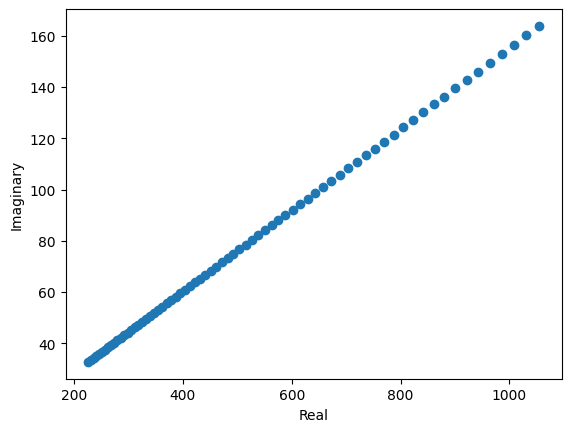

In [39]:
Z_fit = circuit.predict(freqs)

plt.plot(Z_fit.real, -Z_fit.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
# plt.xlim(0,2e8)

# 24-05-23 Electrolysis of pure water

- Scan: linear dual
- Start: -3V
- Stop: 3V
(We would have been switching cathode and anode)
- No. of points: 100

No electrolysis occurred due to lack of EDL. However, solution turned yellow a tiny bit (shown below).


# Base Time
05/23/2024 09:57:03.867998320

In [6]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # Delete the first 140 lines
  lines = lines[140:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [11]:
# prep_csv('0618_il2.z')
df = pd.read_csv('0618_il2.z',sep='\t')


In [12]:
df

,Freq(Hz),Ampl,Bias,Time(Sec),Z'(a),Z''(b),Aux,Err,Range
0,End Comments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000E+02,0.01,-0.0247,4.54,136.130,-468.20000,0.0,0.0,5.0
2,1.258925E+02,0.01,-0.0247,5.42,112.570,-386.74000,0.0,0.0,5.0
3,1.584893E+02,0.01,-0.0247,6.31,92.636,-318.62000,0.0,0.0,5.0
4,1.995262E+02,0.01,-0.0247,7.18,77.082,-262.22000,0.0,0.0,5.0
5,2.511886E+02,0.01,-0.0247,8.05,64.576,-215.40000,0.0,0.0,5.0
6,3.162278E+02,0.01,-0.0247,12.81,54.435,-176.80000,0.0,0.0,4.0
7,3.981072E+02,0.01,-0.0247,13.67,46.411,-144.97000,0.0,0.0,4.0
8,5.011872E+02,0.01,-0.0247,14.55,40.133,-118.69000,0.0,0.0,4.0
9,6.309573E+02,0.01,-0.0247,15.43,35.077,-97.01600,0.0,0.0,4.0


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading'] * 1e3

# Potential (mV)
V = df['Value'] * 1e3

In [ ]:
cut1 = 0
cut2 = len(V)
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')